Exercises: Introduction to NLP in Python
===

![](http://static1.squarespace.com/static/538cea80e4b00f1fad490c1b/54668a77e4b00fb778d22a34/54668d8ae4b00fb778d2859c/1416007413413/NLTK.png)

In [1]:
reset -fs

In [2]:
import nltk

In [3]:
nltk?

---
What is NLTK?
---

Natural Language Toolkit (nltk) is a Python package for NLP

__Pros__:

- Common
- Functionality

__Cons__:

- Too academic
- Too slow
- Awkward API

---
What are Corpus / Corpora?
---

> a collection of written texts, especially the entire works of a particular author or a body of writing on a particular subject.

The rest of the world call them "documents".

---
0) Download `nltk` corpora
---

![](images/download_all_the_corpora.png)

In [4]:
# Genesis is the first book in the Bible
nltk.download('genesis')

[nltk_data] Downloading package genesis to /Users/beiming/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


True

----

In [5]:
# Double check that you have the corpora
from nltk.corpus import genesis

assert genesis.words()[:3] == ['In', 'the', 'beginning']

---
1) Zipf's Law:
---

Zipf's Law (not a real "law") is a NLP phenomena:

>  the frequency of any word is inversely proportional to its rank in the frequency table. 

or in Plain English:

> a rank r word occurs 1/r times as often as the most frequent word, so the rank 2 word occurs half as often as the rank 1 word, the rank 3 word one-third as often, the rank 4 word one-fourth as often,...

> the most frequent word will occur about twice as often as the second most frequent word 

For example:

|Word  |  Rank | Frequency |  Count |
|:-------:|:------:| :---:| :---: |
| “the”   | 1st | 1/10 | 10K |
| "of" | 2nd | 1/20 |  5K |
| "and" |  3rd | 1/30 | 3.3K | 
 
__Word by frequency count:__
![](images/graph-zipf.png)

------
NLP (or Data Science) WorkFlow
------

1. Ask the right question
2. Acquire the relevant data
3. Process: clean and organize
4. Model: Apply Statistics, Machine Learning, and Deep Learning
5. Deliver: Add value, report, presentation, or code/API

-------
TODO: Take the words from "Genesis" and put the words counts into a dictionary

<br>
<details><summary>
Click here for a hint…
</summary>
It is one line of code if you use an import from Python's Standard Library
</details>

In [6]:
print(len(genesis.words()))

d = dict()
for w in genesis.words():
    if w not in d.keys():
        d[w] = 1
    else:
        d[w] += 1

word_counts_sorted_ = sorted(d.items(), key=lambda t: t[1], reverse=True)

315268


In [7]:
# from package

from collections import Counter
d = Counter(genesis.words())

TODO: Sort word counts from high to low.

<br>
<details><summary>
Click here for a hint…
</summary>
Use the keyword arguments for `sorted`
</details>

In [8]:
word_counts_sorted = d.most_common()
word_counts_sorted[:5]

[(',', 22643), ('.', 11069), ('the', 4642), ('and', 4368), (':', 3636)]

In [9]:
word_counts_sorted_ == word_counts_sorted

True

In [10]:
assert word_counts_sorted[0]  == (',', 22643)
assert word_counts_sorted[1]  == ('.', 11069)
assert word_counts_sorted[-1] == ('kista', 1)

Take a small sample to visualize

In [11]:
sample = word_counts_sorted[:15]

In [12]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

TODO: Plot the words by often they occur.

You'll need to extract the data from data structure in an efficent way.

<br>
<details><summary>
Click here for a big hint…
</summary>
labels, values = zip(*sample)
</details>

In [13]:
# Default image size
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 9 

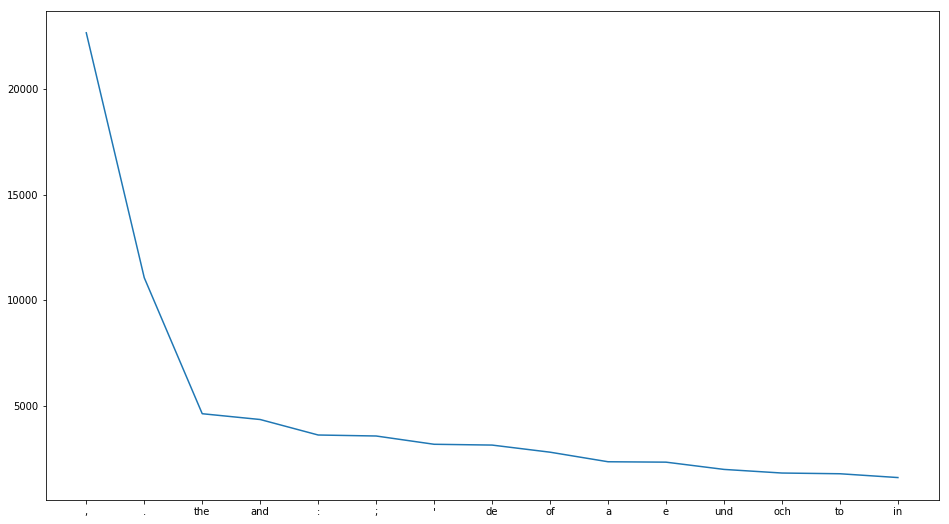

In [14]:
x, y = zip(*sample)

plt.plot(x, y);
# plt.bar(x, y);

TODO: Does this data appear to support Zipf Law? Why or Why not?

In [15]:
# The trend is a little different than the Zipf Law, 
# some of the punctuation might affect a little bit

TODO: Remove punctuation and plot the updated data
<br>
<br>
<details><summary>
Click here for a hint...
</summary>
Import all punctuation symbols from Python's Standard Library
</details>

In [16]:
sample_ = [i for i in sample if i[0].isalpha()]
sample_

[('the', 4642),
 ('and', 4368),
 ('de', 3160),
 ('of', 2824),
 ('a', 2372),
 ('e', 2353),
 ('und', 2010),
 ('och', 1839),
 ('to', 1805),
 ('in', 1625)]

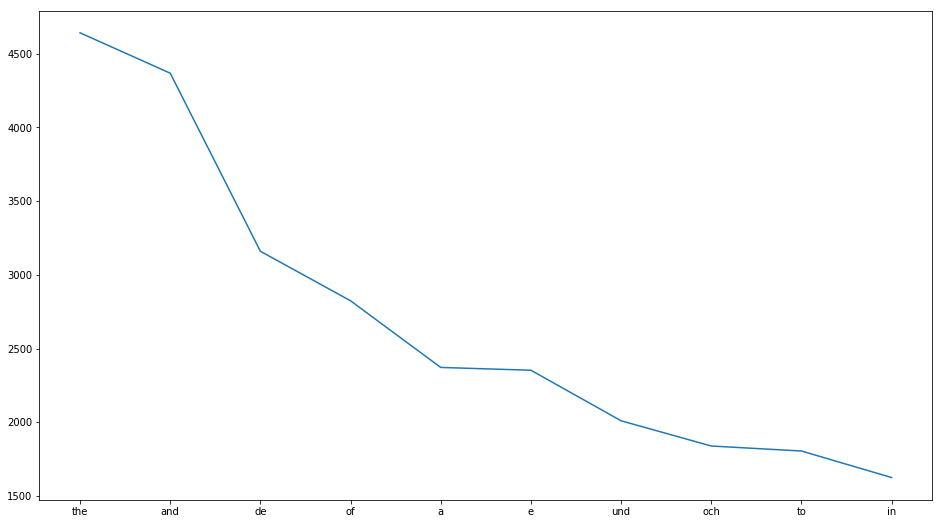

In [17]:
x, y = zip(*sample_)

plt.plot(x, y);

In [18]:
word_counts_sorted_ = [i for i in word_counts_sorted if i[0].isalpha()]
word_counts_sorted_[:5]

[('the', 4642), ('and', 4368), ('de', 3160), ('of', 2824), ('a', 2372)]

TODO: Create a new data structure that has word frequency by word rank.
<br>
<br>
<details><summary>
Click here for a hint...
</summary>
It is one line code if you do it Pythonically.
</details>

In [19]:
import pandas as pd

df = pd.DataFrame(word_counts_sorted_)
df.columns = ['word', 'frequency']
df.insert(loc=1, column= 'rank', value=np.arange(len(word_counts_sorted_))+1)
df.head()

,word,rank,frequency
0,the,1,4642
1,and,2,4368
2,de,3,3160
3,of,4,2824
4,a,5,2372


In [20]:
# one line
rank_freq = [(np.log(i+1), np.log(j[1])) for i,j in enumerate(word_counts_sorted_)]

TODO: Plot word frequency against word rank for all the data
<br>
<br>
<details><summary>
Click here for a hint...
</summary>
Plot it on log/log scale
</details>

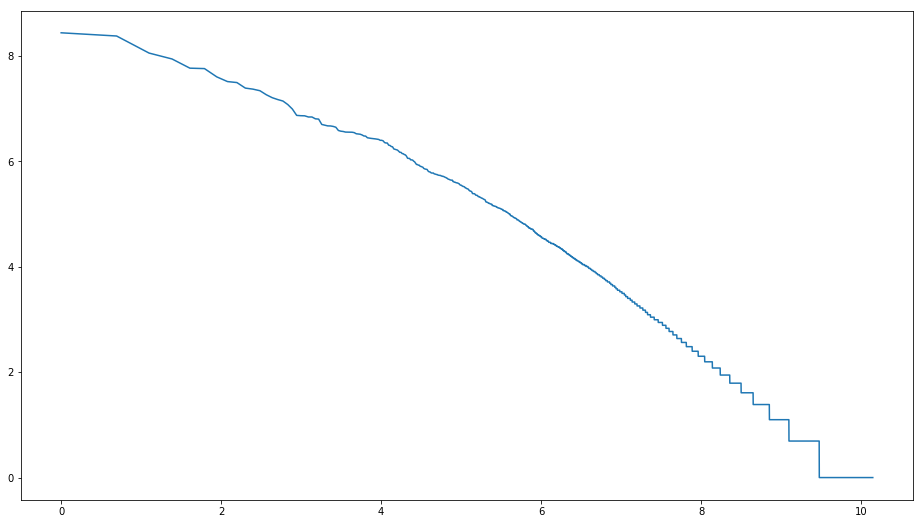

In [21]:
log_rank, log_frequency = zip(*rank_freq)

plt.plot(log_rank, log_frequency);

TODO: Describe the what the plot tells you about the data

In [22]:
# Data is roughly lineaer in log/log scale with fat dots

TODO: How does your result compare to Wikipedia?
    
![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Wikipedia-n-zipf.png)

In [23]:
# Very similar to the plot above in the sense that it looks roughly linear, 
# There's seems to be a 'kink' in the middle and two linear regression can
# summarize the graph well

TODO: Fit and plot a linear model to the data

__Mar's Law__:

> Everything is linear if plotted log-log with a fat magic marker

<br>
<details><summary>
Click here for a hint…
</summary>
You can also fit a model in R by using Feather - https://github.com/wesm/feather
</details>

In [24]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(log_rank, log_frequency)

r-squared: 0.9748284492135972


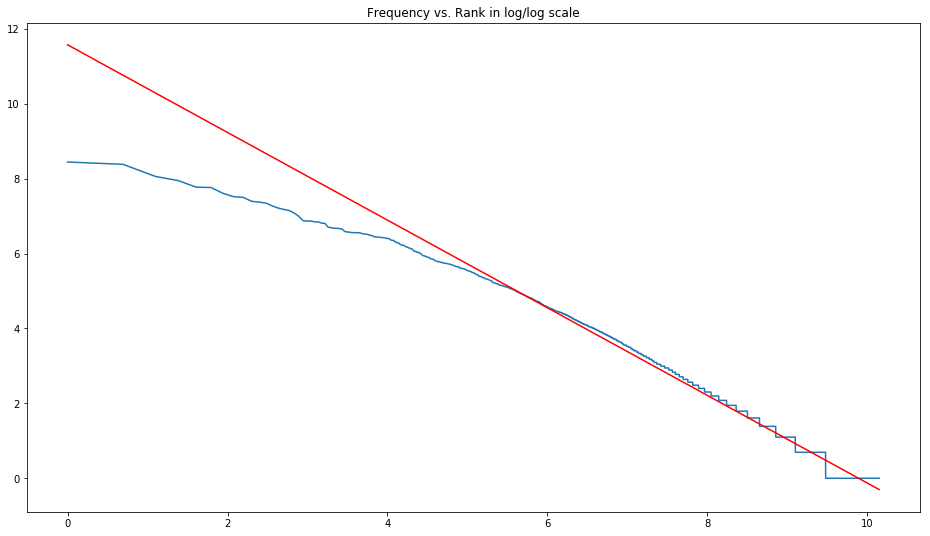

In [25]:
print("r-squared:", r_value**2)
plt.plot(log_rank, log_frequency);
plt.title('Frequency vs. Rank in log/log scale')
plt.plot(log_rank, intercept+[slope*i for i in list(log_rank)], 'r');

TODO: Is a linear model a useful model for the data? Why or Why not?

In [26]:
# A linear model is useful for this data given the R^2 value 
# is very close to 1. The data is pretty linear by visual check
# Although it doesn't fit well with data whose log rank less than 5

TODO: How would summarize what you found in a couple of sentences?

In [27]:
# Word frequency and word rank shows a linearly relationship in log/log scale.
# The linear model does not capture higher rank words' frequency
# Maybe two linear models works better

TODO: How did Data Science Workflow work for this problem?

In [28]:
# Although a simple lab, we still follow the DS workflow for it:

# We downloaded the data
# Organized the data into a dictionary, then a sorted list
# Cleaned the data and removed all punctuation
# Applied some simple linear regression models
# Delivered our results and interpretation

<br>
<br> 
<br>

----